### Modules import

In [1]:
from pycaret import *

In [71]:
import pycaret.classification as pycc

In [3]:
import pandas as pd
# import scikit-learn as sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection

%matplotlib inline

In [4]:
%cd D:/wildfire project

D:\wildfire project


In [5]:
os.listdir()

['.ipynb_checkpoints',
 'Excel formats',
 'Feature engineering.ipynb',
 'Fire weather fia merge.ipynb',
 'fire1992_merged.csv',
 'fire1993_merged.csv',
 'fire1994_merged.csv',
 'fire1995_merged.csv',
 'fire1996_merged.csv',
 'fire1997_merged.csv',
 'fire1998_merged.csv',
 'fire1999_merged.csv',
 'fire2000_merged.csv',
 'fire2002_merged.csv',
 'fire2003_merged.csv',
 'fire2004_merged.csv',
 'fire2005_merged.csv',
 'fire2006_merged.csv',
 'fire2007_merged.csv',
 'fire2008_merged.csv',
 'fire2009_merged.csv',
 'fire2010_merged.csv',
 'fire2011_merged.csv',
 'fire2012_merged.csv',
 'fire2013_merged.csv',
 'fire2014_merged.csv',
 'fire2015_merged.csv',
 'logs.log',
 'merged file transformation',
 'merged_duration.csv',
 'Merged_dur_firestations.csv',
 'Pycaret classification.ipynb',
 'requred column from FIA.xlsx',
 'sustainability-14-10107-v2 (2).pdf',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Wildfire',
 'Wildfire classification.ipynb',
 'wildfire project.zip',
 'Wildfire severity predicti

### Read files

In [81]:
df = pd.concat(map(pd.read_csv, [ 'fire1992_merged.csv',
 'fire1993_merged.csv',
 'fire1994_merged.csv',
 'fire1995_merged.csv',
 'fire1997_merged.csv',
 'fire1999_merged.csv',
 'fire1998_merged.csv',
 'fire2000_merged.csv',
 'fire2002_merged.csv',
 'fire2003_merged.csv',
 'fire2004_merged.csv',
 'fire1996_merged.csv',
 'fire2005_merged.csv',
 'fire2007_merged.csv',
 'fire2010_merged.csv',
 'fire2006_merged.csv',
 'fire2009_merged.csv',
 'fire2008_merged.csv',
 'fire2012_merged.csv',
 'fire2011_merged.csv',
 'fire2014_merged.csv',
 'fire2013_merged.csv',
 'fire2015_merged.csv']))

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139394 entries, 0 to 8303
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        139394 non-null  int64  
 1   Unnamed: 0          139394 non-null  int64  
 2   FOD_ID              139394 non-null  int64  
 3   FPA_ID              139394 non-null  object 
 4   FIRE_NAME           81725 non-null   object 
 5   FIRE_YEAR           139394 non-null  int64  
 6   DISCOVERY_DOY       139394 non-null  int64  
 7   DISCOVERY_TIME      139394 non-null  int64  
 8   STAT_CAUSE_CODE     139394 non-null  float64
 9   STAT_CAUSE_DESCR    139394 non-null  object 
 10  CONT_DOY            139394 non-null  int64  
 11  CONT_TIME           139394 non-null  int64  
 12  FIRE_SIZE           139394 non-null  float64
 13  FIRE_SIZE_CLASS     139394 non-null  object 
 14  LATITUDE            139394 non-null  float64
 15  LONGITUDE           139394 non-null 

In [83]:
df.head()

,Unnamed: 0.1,Unnamed: 0,FOD_ID,FPA_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,d_min,c_month,c_day,c_hour,c_min,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FeltTemp_start
0,0,52738,53173,FS-276639,NaN,1992,99,1305,7.0,Arson,...,5,4,9,14,40,77.080864,62.354927,52.192808,10.306146,77.080864
1,1,52739,53174,FS-276641,NaN,1992,133,1400,7.0,Arson,...,0,5,13,19,0,87.979259,72.273413,51.371132,11.006068,87.979259
2,2,52740,53175,FS-276642,NaN,1992,171,1830,7.0,Arson,...,30,6,21,2,0,91.937453,74.402587,48.549445,11.629194,91.937453
3,3,52741,53176,FS-276644,NaN,1992,214,1330,7.0,Arson,...,30,8,2,17,45,89.245916,73.975209,53.836260,12.505792,89.245916
4,4,52742,53177,FS-276646,NaN,1992,244,815,7.0,Arson,...,15,9,2,11,30,93.795612,74.671379,43.929501,14.549308,93.795612


In [84]:
# q = df["FIRE_SIZE"].quantile(0.9999)
# df = df[df["FIRE_SIZE"] < q]

In [85]:
df["FIRE_SIZE"].max()

479549.0

In [87]:
model_df_temp = df[['d_month','temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start','FIRE_SIZE_CLASS']]

In [88]:
model_df_temp.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS
0,4,77.080864,62.354927,52.192808,10.306146,C
1,5,87.979259,72.273413,51.371132,11.006068,D
2,6,91.937453,74.402587,48.549445,11.629194,C
3,8,89.245916,73.975209,53.836260,12.505792,C
4,9,93.795612,74.671379,43.929501,14.549308,D


In [89]:
model_df_temp.describe()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start
count,139394.000000,137884.000000,137884.000000,137884.000000,137884.000000
mean,5.873101,81.865201,56.512231,31.528607,14.522418
std,3.404244,14.044849,15.398494,12.689625,4.645912
min,1.000000,17.818786,-0.134739,0.847965,0.062178
25%,3.000000,71.759263,44.964243,22.205177,11.182997
50%,6.000000,82.906081,60.718178,30.161094,13.833367
75%,9.000000,93.961009,69.706611,39.449409,17.107899
max,12.000000,126.803348,90.786811,99.754396,113.828866


In [90]:
model_df_temp = model_df_temp.dropna()

### Normalization

In [91]:
from sklearn import preprocessing
model_df_temp.iloc[:,1:5] = preprocessing.normalize(model_df_temp.iloc[:,1:5])

In [92]:
model_df_temp.head()

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS
0,4,0.685064,0.554186,0.463869,0.091597,C
1,5,0.701617,0.576366,0.409674,0.087771,D
2,6,0.716155,0.579565,0.378180,0.090587,C
3,8,0.694949,0.576038,0.419218,0.097381,C
4,9,0.729868,0.581053,0.341836,0.113215,D


### Binning of numeric features

In [93]:
model_df_temp['Label_temp'] = pd.cut(x=model_df_temp['temp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp['Label_dew'] = pd.cut(x=model_df_temp['dewPointTemp_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp['Label_hum'] = pd.cut(x=model_df_temp['RelHumidity_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])
model_df_temp['Label_ws'] = pd.cut(x=model_df_temp['Windspeed_start'],
                     bins=[0,0.25,0.50,0.75,1],
                     labels=['vl','l','h','vh'])

In [94]:
model_df_temp.head(50)

,d_month,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,0.685064,0.554186,0.463869,0.091597,C,h,h,l,vl
1,5,0.701617,0.576366,0.409674,0.087771,D,h,h,l,vl
2,6,0.716155,0.579565,0.378180,0.090587,C,h,h,l,vl
3,8,0.694949,0.576038,0.419218,0.097381,C,h,h,l,vl
4,9,0.729868,0.581053,0.341836,0.113215,D,h,h,l,vl
5,9,0.708766,0.571755,0.406405,0.074709,A,h,h,l,vl
6,10,0.779243,0.537039,0.314840,0.072418,B,vh,h,l,vl
7,10,0.727482,0.583728,0.350378,0.085246,B,h,h,l,vl
8,10,0.800734,0.523374,0.275316,0.095422,A,vh,h,l,vl
9,10,0.696506,0.570815,0.420928,0.108945,B,h,h,l,vl


In [95]:
model_df_temp = model_df_temp.drop(['temp_start','dewPointTemp_start','RelHumidity_start','Windspeed_start'], axis=1)

In [96]:
model_df_temp.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,C,h,h,l,vl
1,5,D,h,h,l,vl
2,6,C,h,h,l,vl
3,8,C,h,h,l,vl
4,9,D,h,h,l,vl


In [97]:
model_df_temp = model_df_temp.dropna()

### Label and OneHot Encoding

In [98]:
le = LabelEncoder()
model_df_temp["Label_temp"] = le.fit_transform(model_df_temp["Label_temp"])
model_df_temp["Label_dew"] = le.fit_transform(model_df_temp["Label_dew"])
model_df_temp["Label_hum"] = le.fit_transform(model_df_temp["Label_hum"])
model_df_temp["Label_ws"] = le.fit_transform(model_df_temp["Label_ws"])
model_df_temp["FIRE_SIZE_CLASS"] = le.fit_transform(model_df_temp["FIRE_SIZE_CLASS"])


### Final Data to pass in setup

In [99]:
model_df_temp.head()

,d_month,FIRE_SIZE_CLASS,Label_temp,Label_dew,Label_hum,Label_ws
0,4,2,0,0,1,2
1,5,3,0,0,1,2
2,6,2,0,0,1,2
3,8,2,0,0,1,2
4,9,3,0,0,1,2


In [100]:
clf_fire_size_class = setup(data=model_df_temp, target='FIRE_SIZE_CLASS', categorical_features = ['d_month','Label_temp','Label_dew','Label_hum','Label_ws'], fix_imbalance = True, n_jobs=1)

,Description,Value
0,session_id,371
1,Target,FIRE_SIZE_CLASS
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(137883, 6)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [72]:
available_models = pycc.models()
available_models

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### QDA

In [101]:
qda_clf = pycc.create_model('qda', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
1,0.0264,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
2,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
3,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
4,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
Mean,0.0265,0.0000,0.1429,0.0007,0.0014,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


### LR and tuned LR

In [78]:
lr_clf = pycc.create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2222,0.5338,0.2386,0.4946,0.2826,0.0227,0.0275
1,0.2517,0.5380,0.2395,0.4992,0.3159,0.0274,0.0323
2,0.2348,0.5395,0.2374,0.5011,0.2972,0.0265,0.0317
3,0.2456,0.5399,0.2436,0.4991,0.3081,0.0284,0.0336
4,0.2320,0.5385,0.2142,0.4975,0.2934,0.0237,0.0284
Mean,0.2373,0.5379,0.2347,0.4983,0.2994,0.0258,0.0307
Std,0.0104,0.0022,0.0104,0.0022,0.0116,0.0022,0.0023


In [115]:
tuned_lr_F = tune_model(lr_clf, optimize = 'F1', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2016,0.5372,0.2267,0.4966,0.2557,0.0191,0.0237
1,0.2298,0.5359,0.2174,0.4971,0.2923,0.0232,0.0278
2,0.2285,0.5375,0.2289,0.4927,0.2904,0.0213,0.0255
Mean,0.2200,0.5369,0.2244,0.4955,0.2795,0.0212,0.0257
Std,0.0130,0.0007,0.0050,0.0019,0.0168,0.0017,0.0017


### Random Forest

In [102]:
rf_clf = pycc.create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2176,0.5365,0.2333,0.4960,0.2697,0.0230,0.0278
1,0.1994,0.5361,0.2144,0.4969,0.2501,0.0195,0.0239
2,0.2374,0.5352,0.2299,0.4954,0.2902,0.0267,0.0319
3,0.2490,0.5381,0.2070,0.4897,0.3039,0.0223,0.0262
4,0.2020,0.5405,0.2297,0.5027,0.2346,0.0252,0.0316
Mean,0.2211,0.5373,0.2229,0.4961,0.2697,0.0233,0.0283
Std,0.0194,0.0019,0.0103,0.0041,0.0253,0.0025,0.0031


### KNN

In [103]:
knn_clf = pycc.create_model('knn', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5165,0.4951,0.1501,0.4713,0.4895,-0.0019,-0.0020
1,0.5325,0.5005,0.1536,0.4747,0.4968,0.0098,0.0102
2,0.4975,0.5114,0.1485,0.4757,0.4806,0.0115,0.0117
3,0.5239,0.5013,0.1500,0.4724,0.4909,0.0087,0.0090
4,0.4710,0.5034,0.1461,0.4705,0.4668,0.0054,0.0055
Mean,0.5083,0.5024,0.1497,0.4729,0.4849,0.0067,0.0069
Std,0.0219,0.0053,0.0024,0.0020,0.0104,0.0048,0.0049


In [1]:
# tuned_knn = tune_model(knn_clf, n_iter=10,optimize='Accuracy', fold=3)

In [ ]:
# blend = blend_models()
# voting_clf = pycc.blend_models([knn_clf, , et_clf_voting])

In [110]:
print(knn_clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')


In [109]:
# evaluation_best_clf = pycc.evaluate_model(knn_clf)

### GBC

In [104]:
gbc_clf = pycc.create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2457,0.5386,0.2419,0.4991,0.3049,0.0282,0.0333
1,0.2319,0.5382,0.2273,0.4975,0.2912,0.0240,0.0286
2,0.2455,0.5378,0.2355,0.5019,0.2997,0.0311,0.0371
3,0.2561,0.5397,0.2156,0.4982,0.3135,0.0297,0.0349
4,0.2671,0.5424,0.2440,0.4987,0.3242,0.0324,0.0376
Mean,0.2493,0.5393,0.2329,0.4991,0.3067,0.0291,0.0343
Std,0.0118,0.0017,0.0104,0.0015,0.0113,0.0029,0.0033


In [112]:
tuned_gbc = tune_model(gbc_clf,n_iter=10,optimize='Accuracy', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2875,0.5380,0.2326,0.4985,0.3529,0.0304,0.0346
1,0.2783,0.5351,0.2100,0.5003,0.3464,0.0312,0.0355
2,0.2905,0.5395,0.2332,0.4925,0.3541,0.0277,0.0311
Mean,0.2854,0.5375,0.2253,0.4971,0.3511,0.0298,0.0337
Std,0.0052,0.0019,0.0108,0.0034,0.0034,0.0015,0.0019


### Other Models

In [105]:
lightgbm_clf = pycc.create_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2516,0.5372,0.2330,0.4979,0.3137,0.0274,0.0320
1,0.2185,0.5369,0.2109,0.4986,0.2738,0.0222,0.0269
2,0.2666,0.5358,0.2280,0.4944,0.3249,0.0285,0.0329
3,0.2372,0.5376,0.2191,0.4976,0.2890,0.0271,0.0324
4,0.2301,0.5409,0.2326,0.4995,0.2740,0.0282,0.0342
Mean,0.2408,0.5377,0.2247,0.4976,0.2951,0.0267,0.0317
Std,0.0168,0.0017,0.0085,0.0017,0.0208,0.0023,0.0025


In [106]:
dummy_clf = pycc.create_model('dummy', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
1,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
2,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
3,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
4,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
Mean,0.1294,0.5000,0.1429,0.0167,0.0296,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [107]:
dt_clf = pycc.create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2179,0.5366,0.2333,0.4961,0.2699,0.0232,0.0281
1,0.1948,0.5360,0.2132,0.4968,0.2475,0.0193,0.0237
2,0.2375,0.5352,0.2290,0.4960,0.2904,0.0271,0.0324
3,0.2418,0.5379,0.2074,0.4922,0.2951,0.0230,0.0273
4,0.2152,0.5408,0.2296,0.4999,0.2556,0.0260,0.0319
Mean,0.2214,0.5373,0.2225,0.4962,0.2717,0.0237,0.0287
Std,0.0170,0.0020,0.0102,0.0025,0.0187,0.0027,0.0032


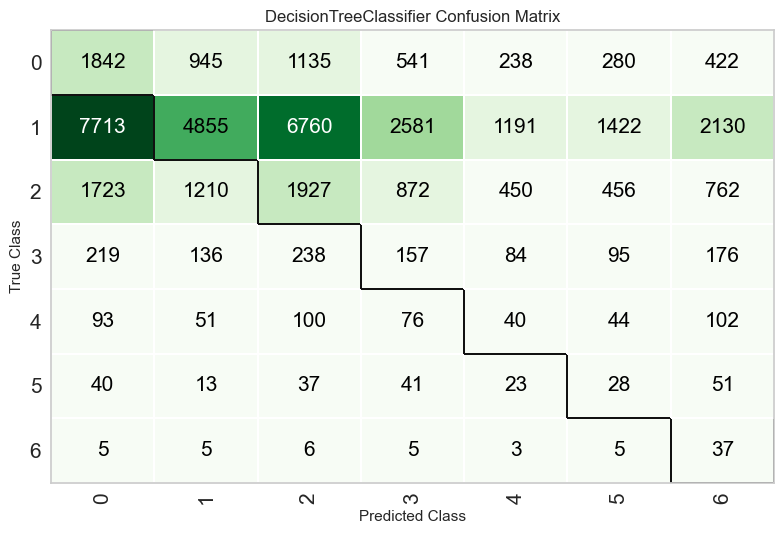

In [114]:
plot_model(dt_clf, plot='confusion_matrix')